## Lab10 - Classification
Name: Anh Kieu  
Class: CSCI 349 - Intro to Data Mining  
Lab 10 - Classification  
Semester: Spring 2021  
Instructor: Brian King  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objects as go
import plotly.express as px

#### 1) [P] Read about the famous Fisher's Iris dataset. 
This is perhaps the most commonly used dataset to teach 
students how to build classification models: https://en.wikipedia.org/wiki/Iris_flower_data_set :
Then, include the following code to import a copy of the Iris data from Seaborn's library of datasets:
df_iris = sns.load_dataset('iris')
Print out the results of info() to understand the types of each variable as read in from the csv file

In [2]:
df_iris = sns.load_dataset('iris')

In [3]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#### 2) [P] Be thankful for a moment, because the data are clean. However, the species variable needs work. 
Convert the variable to a pandas Categorical variable. Then show the distribution of your variable (how 
many of each species?). Repeat the info() output to show that your variable is now categorical, and not 
merely an object.

In [4]:
df_iris.species = pd.Categorical(df_iris.species)

In [5]:
df_iris.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [6]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   sepal_length  150 non-null    float64 
 1   sepal_width   150 non-null    float64 
 2   petal_length  150 non-null    float64 
 3   petal_width   150 non-null    float64 
 4   species       150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


#### 3) [P] Now, perform essential summarizing tasks on your data. Show the output of describe() and show the first 10 observations.

In [7]:
df_iris.describe(include = 'all')

sepal_length  sepal_width  petal_length  petal_width species
count     150.000000   150.000000    150.000000   150.000000     150
unique           NaN          NaN           NaN          NaN       3
top              NaN          NaN           NaN          NaN  setosa
freq             NaN          NaN           NaN          NaN      50
mean        5.843333     3.057333      3.758000     1.199333     NaN
std         0.828066     0.435866      1.765298     0.762238     NaN
min         4.300000     2.000000      1.000000     0.100000     NaN
25%         5.100000     2.800000      1.600000     0.300000     NaN
50%         5.800000     3.000000      4.350000     1.300000     NaN
75%         6.400000     3.300000      5.100000     1.800000     NaN
max         7.900000     4.400000      6.900000     2.500000     NaN

In [8]:
df_iris.head(10)

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
5           5.4          3.9           1.7          0.4  setosa
6           4.6          3.4           1.4          0.3  setosa
7           5.0          3.4           1.5          0.2  setosa
8           4.4          2.9           1.4          0.2  setosa
9           4.9          3.1           1.5          0.1  setosa

### Visual EDA and Plotting

#### 4) [P] Always start with basic univariate plots. Create a single boxplot 
showing the distribution of each of the four 
independent variables on one plot, using a boxplot. Ignore the target variable species for the time. For 
example:

Text(0, 0.5, 'cm')

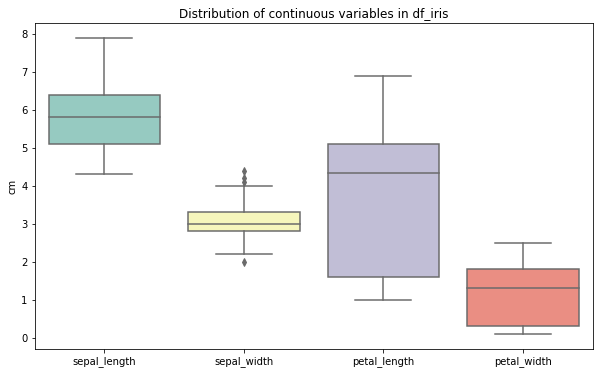

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))
p = sns.boxplot(data = df_iris, palette = 'Set3', ax = ax)
p.set_title('Distribution of continuous variables in df_iris')
p.set_ylabel('cm')

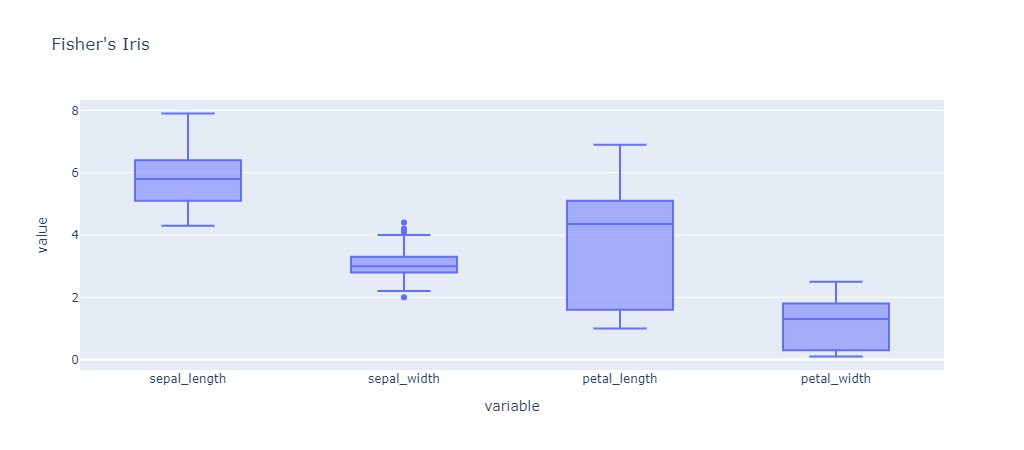

In [10]:
df_iris_melt = pd.melt(df_iris, id_vars="species")
fig = px.box(df_iris_melt, x='variable',y='value',title="Fisher's Iris")
fig.show()

#### 5) [M/P] Violin plots are becoming increasingly common in data science. First, briefly explain what a violin plot is. 
Then, figure out how to generate a univariate violin plot of each independent variable. Compare and contrast 
your violin plot against the boxplot. (NOTE: Seaborn makes this very easy!)

#### ref: https://towardsdatascience.com/violin-plots-explained-fb1d115e023d
Violin plot's main purpose is like boxplot's in the way that it shows the distribution of the continuous variable. However, it also shows the shape of the distribution as well (hence, the curves instead of a box like boxplot). There is a little bar in the middle that represents the same thing that the box in boxplot represents.

Text(0, 0.5, 'cm')

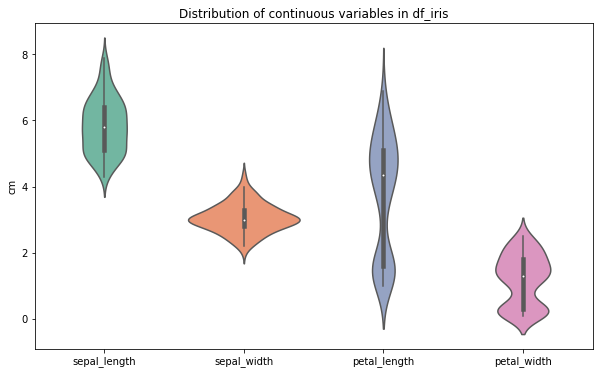

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))
p = sns.violinplot(data = df_iris, palette = 'Set2', ax = ax)
p.set_title('Distribution of continuous variables in df_iris')
p.set_ylabel('cm')

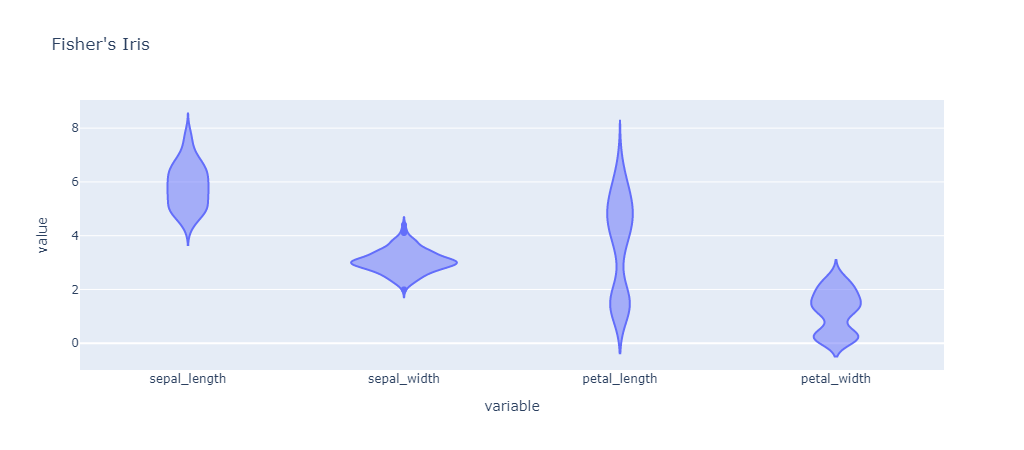

In [12]:
fig = px.violin(df_iris_melt, x='variable',y='value',title="Fisher's Iris")
fig.show()

#### 6) [P] Show a histogram and/or a density plot of each variable on a single plot. And be sure to provide some way 
to see the distribution of all four variables separately. You could use alpha blending on the histogram, or 
perhaps consider a "rugplot" overlaid on top. 

Text(0.5, 1.0, "Fisher's Iris Data")

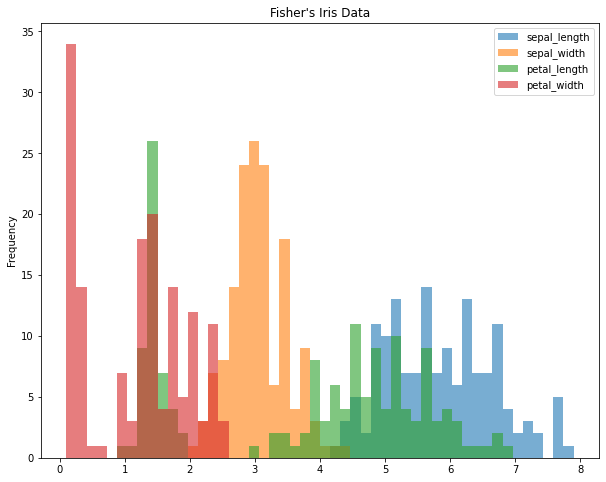

In [13]:
p = df_iris.plot.hist(bins = 50, alpha=0.6, figsize = (10,8))
p.set_title("Fisher's Iris Data")

#### 7) [M] Summarize your findings from these plots.

- Violin plot seems to best at clearly comparing and describing the distributions of the variables. With boxplot, we can only see the skewness without actually knowing that there are two local peaks in petal_width and petal_length, while histrogram plot is hard to observe with 4 variables overlapping each other.
- Summary:
    - Sepal_length: Normal distribution, with a mean around 6 and no outlier, the range goes from approx. 4 to 8.
    - Sepal_width: Normal distribution, with a mean around 3 and have both lower and upper outliers, the range goes from approx. 2 to approx 4.5.
    - Petal_length: There are two local peaks, kind of like two normal distribution mix together, the mean of the distribution is around 4.5. There exists no outlier, the range span from 0 to 8. There are more values towards the larger value part of the range.
    - Petal_width: Same shape as the petal_length where there exist two local peaks, the mean is around 1.75. The range is from 0 to approx. 3. There are more data towards the larger value part of the range.

#### 8) [P] Use the pandas interface to generate a quick boxplot (df_iris.boxplot()!) However, look up how to 
created a faceted boxplot with each variable listed in a separate plot, automatically showing the distributions 
of your variables by "species". 

array([[<AxesSubplot:title={'center':'petal_length'}, xlabel='[species]'>,
        <AxesSubplot:title={'center':'petal_width'}, xlabel='[species]'>],
       [<AxesSubplot:title={'center':'sepal_length'}, xlabel='[species]'>,
        <AxesSubplot:title={'center':'sepal_width'}, xlabel='[species]'>]],
      dtype=object)

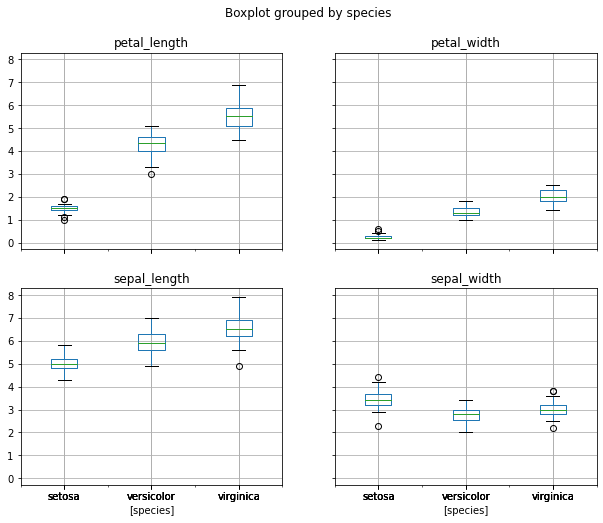

In [14]:
df_iris.boxplot(by = 'species', figsize = (10,8))

#### 9) [P] Use either seaborn or plotly to generate a boxplot over each variable, but now showing the three different species as distinct boxplots.

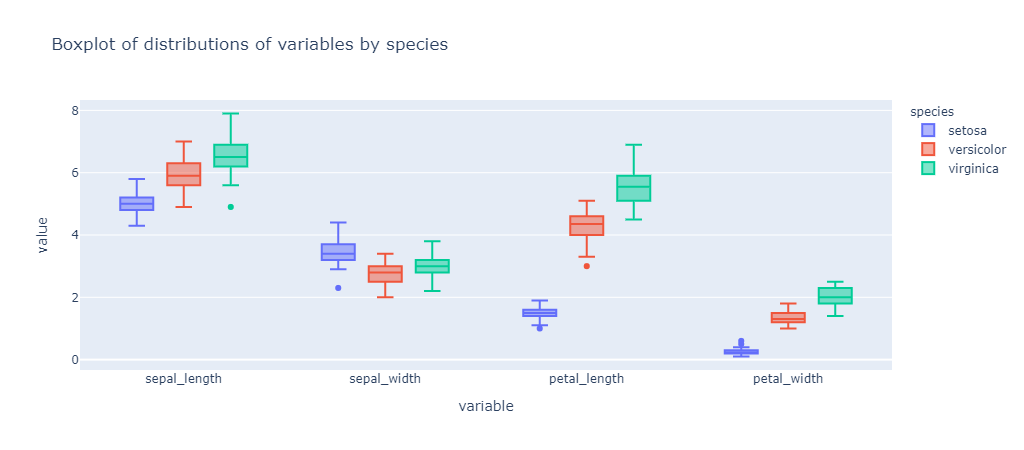

In [15]:
fig = px.box(df_iris_melt, x="variable", y="value", color = "species", title = "Boxplot of distributions of variables by species")
fig.show()

#### 10) [P] Generate a violin plot over all variables much like the previous boxplot, but again, be sure to indicate the species as a distinct color.

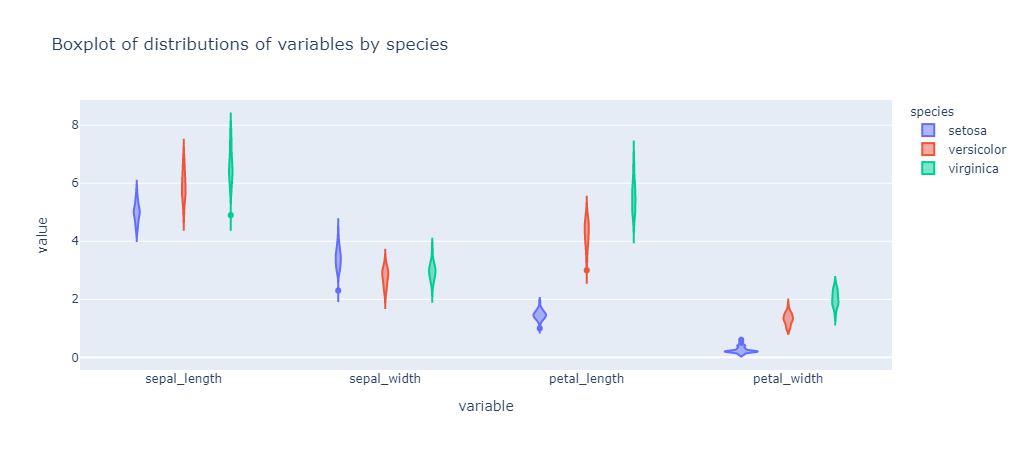

In [16]:
fig = px.violin(df_iris_melt, x="variable", y="value", color = "species", title = "Boxplot of distributions of variables by species")
fig.show()

#### 11) [P] Read about the scatter_matrix() function in pandas. Use it to generate a scatterplot matrix, and use species for the color

array([[<AxesSubplot:xlabel='sepal_length', ylabel='sepal_length'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>,
        <AxesSubplot:xlabel='petal_length', ylabel='sepal_length'>,
        <AxesSubplot:xlabel='petal_width', ylabel='sepal_length'>],
       [<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='sepal_width'>,
        <AxesSubplot:xlabel='petal_length', ylabel='sepal_width'>,
        <AxesSubplot:xlabel='petal_width', ylabel='sepal_width'>],
       [<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='petal_length'>,
        <AxesSubplot:xlabel='petal_length', ylabel='petal_length'>,
        <AxesSubplot:xlabel='petal_width', ylabel='petal_length'>],
       [<AxesSubplot:xlabel='sepal_length', ylabel='petal_width'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='petal_width'>,
        <AxesSubplot:xlabel='petal_length', ylabel='petal_

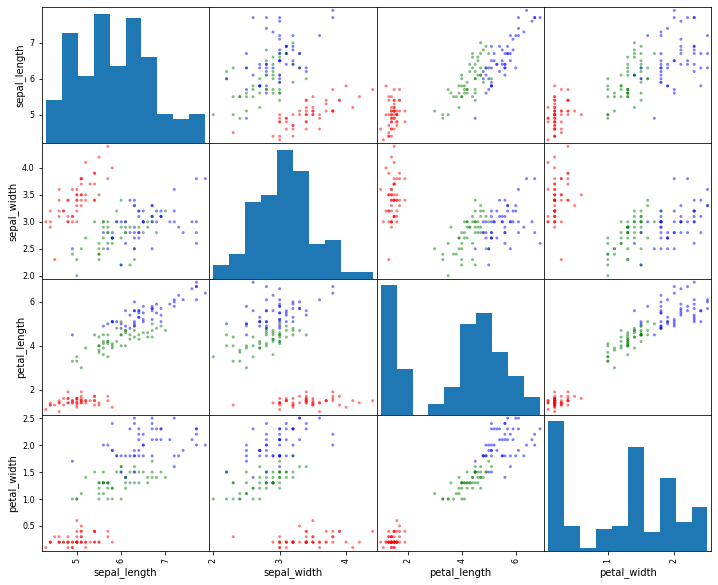

In [17]:
colors = {'setosa': 'r', 'versicolor': 'g', 'virginica': 'b'}
pd.plotting.scatter_matrix(df_iris, c = df_iris.species.apply(lambda x: colors[x]), figsize = (12,10))

#### 12) [P] Read about the seaborn pairplot() function, 
then use it to generate one of the most useful
scatterplots matrices you'll see with this data. (It won't be too different than the scatter_matrix
function, just easier to create, and the diagonal density plots are much better.) Take a moment to study the 
plot, and really try to understand just how much information this plot is conveying. Be sure to figure out how 
to distinguish the species by color.

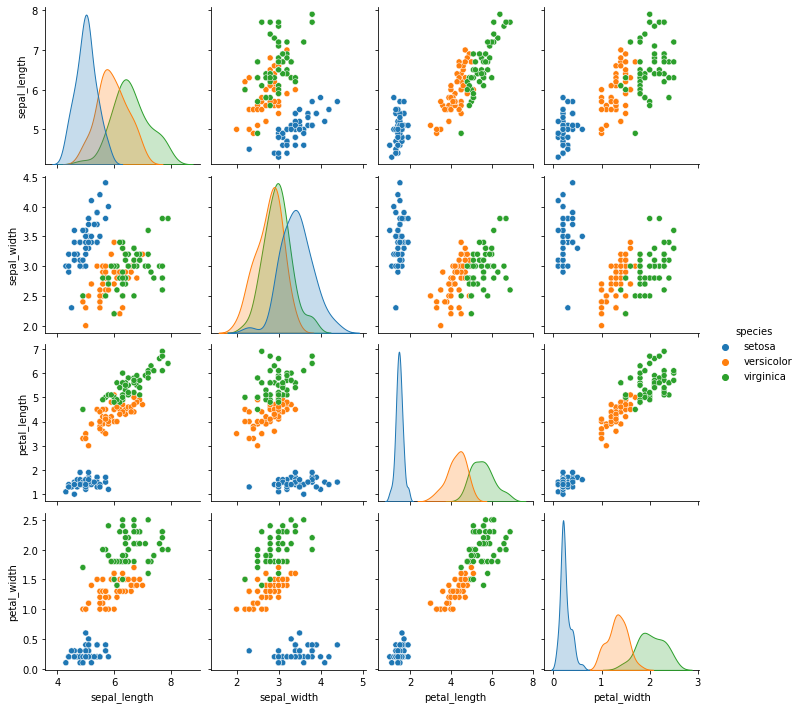

In [18]:
p = sns.pairplot(data = df_iris, hue = 'species')

#### 13) [M] From your observations, which species do you expect to have the best classifier performance? Why?

I predict that setosa will have the best classifier performance as from the scatter plots, we notice that for every feature, setosa has its own cluster and does not stick to the other two clusters.

#### Notes: The convention generally followed
is 
to use the name X to represent the data frame for your independent variables, and the target variable is denoted
y. Both should be data frames, though if y is a single variable (most common), then it's OK to represent it as a 
pd.Series or even a np.array object.

#### 14) [P] Split your data frame into X and y, where X represents only your four predictor variables, and y represents only the target class, species.

In [19]:
X = df_iris.iloc[:, 0:-1]
y = df_iris.iloc[:, [-1]]

In [20]:
print(f'X: {X.shape}, y: {y.shape}')

X: (150, 4), y: (150, 1)


### Building our classifer

1) Clean your data  
2) Build your model  
3) Evaluation – Evaluate model performance on training data (same data used to build the model.)  
4) Validation – Validate the model by assessing performance on test data (i.e. different data than training data  

In [21]:
from sklearn.tree import DecisionTreeClassifier

#### 15) [P] Create an instance of a decision tree classifier using DecisionTreeCassifier() with default parameters

In [22]:
clf = DecisionTreeClassifier()
clf = clf.fit(X, y)

In [23]:
print(clf.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}


#### 16) [P] Remember that one of the most popular reasons for using decision trees is because the model is easily visualized for model interpretation purposes

In [24]:
from sklearn.tree import plot_tree

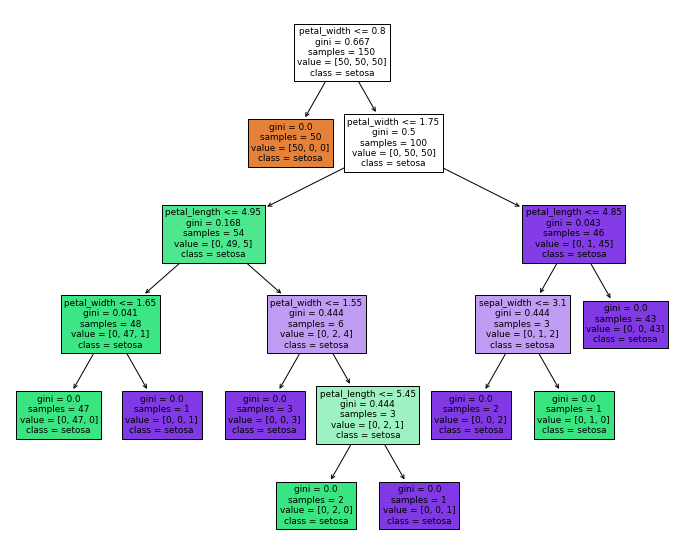

In [25]:
fig = plt.figure(figsize = (12,10))
_ = plot_tree(clf, feature_names = X.columns, class_names = y.species, filled = True)
plt.show()

#### 17) [P] - Use this model to predict back your training data to evaluate your model. Name your predictions y_pred. Then, report the accuracy using the score method on the classifier

In [26]:
pred = clf.predict(X)
score = clf.score(X, y)
score

1.0

#### 18) [M] You should see 100% accuracy. Why are you getting a perfect score?

We got a perfect score because our model trained with the test data, thus it should know everything about the test data's labels.

#### 19) [P] Let's simplify our tree structure. Create a new tree, but adjust the pruning / complexity parameters. How? 
We'll keep this simple. Ensure that every leaf in the tree contains at least 5 samples. Show the tree that you 
induced, and again store your predictions as y_pred.

In [27]:
clf = DecisionTreeClassifier(min_samples_leaf = 5)
clf = clf.fit(X, y)
pred = clf.predict(X)
score = clf.score(X, y)
print(score)

0.9733333333333334


#### 20) [M/P] OK – clearly we have lower accuracy. Dive deeper. 
Accuracy is usually not a good measure of classifier 
performance. Look up the function classification_report. This outputs a lot of performance 
information!  
Which class had the lowest precision? Which had the lowest recall?

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y, pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.98      0.94      0.96        50
   virginica       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



Lowest precision: virginica with 0.94, lowest recall: versicolor: 0.94

#### 21) [P] Output a confusion matrix using the confusion_matrix method in sklearn.metrics

In [29]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y, pred))

[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]


#### 22) [P] Even better! Use the plot_confusion_matrix to output an excellent visual summary of the classifier performance

<Figure size 864x720 with 0 Axes>

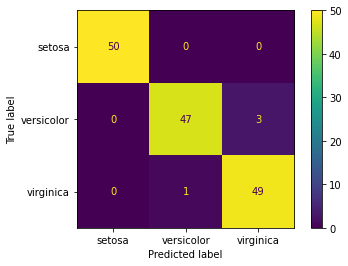

In [30]:
from sklearn.metrics import plot_confusion_matrix
fig = plt.figure(figsize = (12,10))
_ = plot_confusion_matrix(clf, X, y)

#### 23) [M] Interpret your confusion matrix and classification report. Which class is performing the best? Which is performing the worst? How many total incorrect predictions?

Setosa is performing the best with no wrong setosa being labeled. Virginica is performing the worst with 3 wrongly labeled to versicolor. In total there are 4 incorrect predictions.

### Evaluation vs Validation

#### 24) You need to create a train / test split of your data to properly validate your model.
Read about the function 
called train_test_split. in the package sklearn.model_selection. Then, use it to split your data 
into an 70% / 30% split of training and testing data, respectively.

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [32]:
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

X_train: (105, 4)
X_test: (45, 4)
y_train: (105, 1)
y_test: (45, 1)


#### 25) Create a new instance of DecisionTreeClassifier with an initial random seed value of 100, and a minimum number of samples in a leaf set to 5.

In [33]:
clf = DecisionTreeClassifier(random_state = 100, min_samples_leaf = 5)
clf = clf.fit(X_train, y_train)

#### 26) Use this model to predict the labels on your training data and your test data. 
Call your predictions 
y_pred_train. and y_pred_test. Show the accuracy of your classifier on both your training data and 
test data.

In [34]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

In [35]:
clf.score(X_train, y_train)

0.9619047619047619

In [36]:
clf.score(X_test, y_test)

0.9111111111111111

#### 27) [P/M] Use the classification report and confusion matrix techniques discussed above to assess the 
performance of your classifier on both the training and the test data. Summarize your findings.

##### Training data

In [37]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        34
  versicolor       0.91      0.97      0.94        32
   virginica       0.97      0.92      0.95        39

    accuracy                           0.96       105
   macro avg       0.96      0.96      0.96       105
weighted avg       0.96      0.96      0.96       105



Versicolor has the lowest precision while virginica has the lowest recall.

<Figure size 864x720 with 0 Axes>

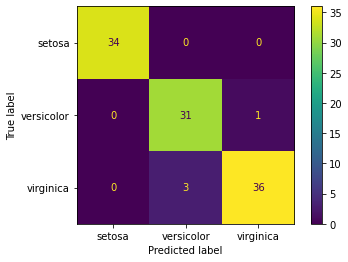

In [38]:
fig = plt.figure(figsize = (12,10))
_ = plot_confusion_matrix(clf, X_train, y_train)

Setosa is performing the best with no wrong setosa being labeled. Versicolor is performing the worst with 3 wrongly labeled to versicolor. In total there are 4 incorrect predictions.

##### Testing data

In [39]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.85      0.94      0.89        18
   virginica       0.89      0.73      0.80        11

    accuracy                           0.91        45
   macro avg       0.91      0.89      0.90        45
weighted avg       0.91      0.91      0.91        45



Versicolor has the lowest precision, while virginica has the lower recall.

<Figure size 864x720 with 0 Axes>

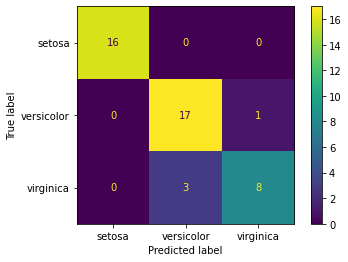

In [40]:
fig = plt.figure(figsize = (12,10))
_ = plot_confusion_matrix(clf, X_test, y_test)

Setosa is performing the best with no wrong setosa being labeled. Virginica is performing the worst with 3 wrongly labeled to versicolor. In total there are 4 incorrect predictions.

#### 28) [P] Quite often, when we have misclassifications, it's important to take the time to dig into your test data to determine which observations are being misclassified. 
Use data selection techniques to output the data that 
are being misclassified in the test data only.

In [41]:
# ref: https://datascience.stackexchange.com/questions/37899/sklearn-svm-how-to-get-a-list-of-the-wrong-predictions
indices = [i for i in range(len(y_test)) if y_test.iat[i, 0] != y_pred_test[i]]
misclassified = X_test.iloc[indices, :]

In [42]:
indices

[20, 24, 33, 37]

In [43]:
misclassified

sepal_length  sepal_width  petal_length  petal_width
121           5.6          2.8           4.9          2.0
126           6.2          2.8           4.8          1.8
127           6.1          3.0           4.9          1.8
83            6.0          2.7           5.1          1.6

#### 29) [P] It's even more interesting when you can visualize where in your feature space your classifier might be missing something.
Create a scatterplot matrix, but this time, highlight the instance(s) that are being 
misclassified.

In [44]:
test = X_test.copy()
test['labels'] = y_test
test['obs'] = test.index
test['size'] = test.obs.apply(lambda x: (x in misclassified.index) * 60 + 25)

<Figure size 864x720 with 0 Axes>

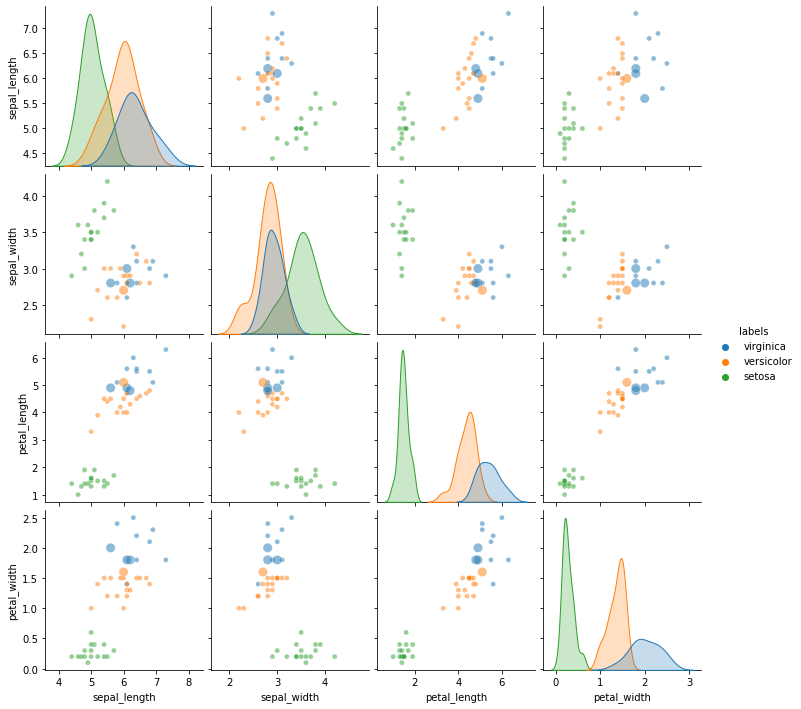

In [45]:
fig = plt.figure(figsize = (12,10))
p = sns.pairplot(data = test.iloc[:, :-2], hue = 'labels', plot_kws={"s": test['size'], "alpha" : 0.5})

### K-fold Cross Validation

#### 30) [M/P] Read about the KFold class. State what a KFold cross validation object will do for you. Then, create an instance of KFold with 10 splits, an initial seed of 100, and be sure to shuffle your data. Call your instance kfold. 

<code>class sklearn.model_selection.KFold(n_splits=5, *, shuffle=False, random_state=None)</code>
Provides train/test indices to split data in train/test sets. Split dataset into k consecutive folds (without shuffling by default). Each fold is going to be used for testing once for each run, while the others are used for training in that run. Return kfold object

In [46]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits = 10, random_state = 100, shuffle = True)
kfold

KFold(n_splits=10, random_state=100, shuffle=True)

#### 31) [P] Read about the split() method for KFold. Iterate the fold of your data.

In [47]:
df_results = pd.DataFrame(columns = ['pred', 'label'])
for train_idx, test_idx in kfold.split(df_iris):
    clf = clf.fit(X.iloc[train_idx], y.iloc[train_idx])
    df_r = pd.DataFrame({'pred': clf.predict(X.iloc[test_idx]), 'label': y.iloc[test_idx].species}, index = test_idx)
    df_results = pd.concat([df_results, df_r])

In [48]:
df_results.head(10)

pred      label
1       setosa     setosa
11      setosa     setosa
15      setosa     setosa
26      setosa     setosa
28      setosa     setosa
32      setosa     setosa
40      setosa     setosa
45      setosa     setosa
115  virginica  virginica
116  virginica  virginica

#### 32) [P] Print out a classification report from your 10 fold cross validation. Also print out your confusion matrix.

In [49]:
print(classification_report(df_results['label'], df_results['pred']))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.94      0.92      0.93        50
   virginica       0.92      0.94      0.93        50

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



In [50]:
print(confusion_matrix(df_results['label'], df_results['pred']))

[[50  0  0]
 [ 0 46  4]
 [ 0  3 47]]


Text(0.5, 1.0, 'Visualization of confusion matrix')

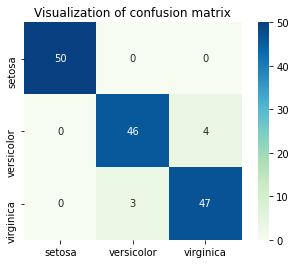

In [51]:
# fig = plt.figure(figsize = (10, 8))
ax = sns.heatmap(confusion_matrix(df_results['label'], df_results['pred']), cmap = 'GnBu', square = True, annot = True, xticklabels = ['setosa', 'versicolor', 'virginica'], yticklabels = ['setosa', 'versicolor', 'virginica'])
ax.set_title('Visualization of confusion matrix')

#### 33) [P] Select and generate a report all of your test instances that were misclassified from the 10 fold cross validation. Also, generate a scatterplot that highlights the location of the instances that were misclassified. 

In [52]:
indices = df_results[df_results['pred'] != df_results['label']].index

In [53]:
indices

Int64Index([77, 133, 134, 70, 76, 83, 106], dtype='int64')

In [54]:
df = X.copy()
df = df.join(df_results)

In [55]:
df.loc[indices]

sepal_length  sepal_width  petal_length  petal_width        pred  \
77            6.7          3.0           5.0          1.7   virginica   
133           6.3          2.8           5.1          1.5  versicolor   
134           6.1          2.6           5.6          1.4  versicolor   
70            5.9          3.2           4.8          1.8   virginica   
76            6.8          2.8           4.8          1.4   virginica   
83            6.0          2.7           5.1          1.6   virginica   
106           4.9          2.5           4.5          1.7  versicolor   

          label  
77   versicolor  
133   virginica  
134   virginica  
70   versicolor  
76   versicolor  
83   versicolor  
106   virginica

In [56]:
df['obs'] = df.index
df['size'] = df.obs.apply(lambda x: (x in indices) * 60 + 25)

<Figure size 864x720 with 0 Axes>

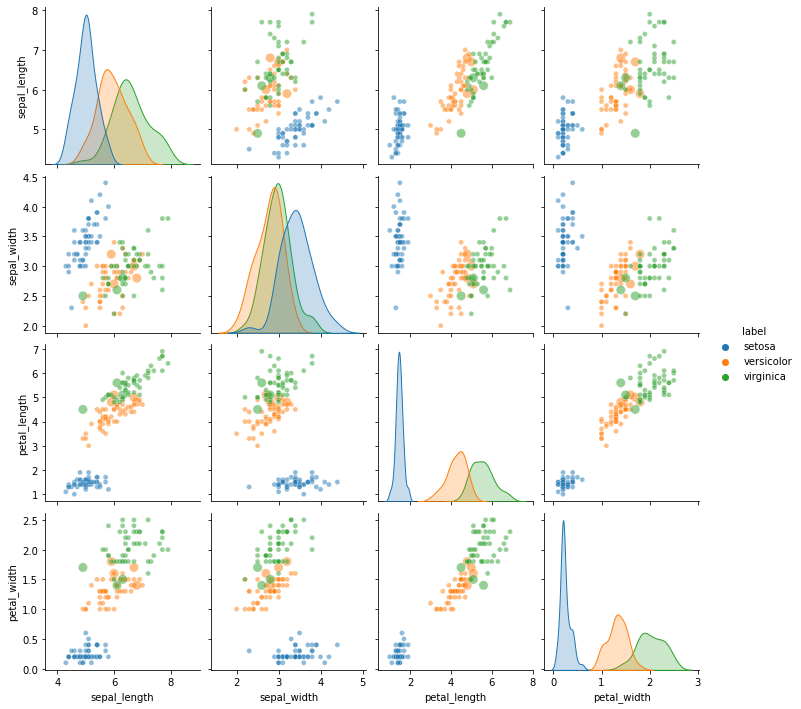

In [57]:
fig = plt.figure(figsize = (12,10))
p = sns.pairplot(data = df.iloc[:, :-2], hue = 'label', plot_kws={"s": df['size'], "alpha" : 0.5})

#### 34) Read about the cross_validate method, then use it to run a 10-fold cross validation on a default decision tree, reporting back 'accuracy' and 'f1_macro' measurements on both the training and testing data. Report your results as a single data frame

In [58]:
from sklearn.model_selection import cross_validate

In [59]:
scores = cross_validate(clf, X, y, cv = 10, scoring = ['accuracy', 'f1_macro'], return_train_score = True)
scores = pd.DataFrame(scores)

In [60]:
scores

fit_time  score_time  test_accuracy  train_accuracy  test_f1_macro  \
0  0.004016    0.002994       1.000000        0.970370       1.000000   
1  0.003988    0.002994       0.933333        0.977778       0.932660   
2  0.006982    0.002991       1.000000        0.970370       1.000000   
3  0.003991    0.001995       1.000000        0.970370       1.000000   
4  0.003989    0.002992       0.933333        0.977778       0.932660   
5  0.004021    0.002954       0.866667        0.970370       0.866667   
6  0.003994    0.001988       0.866667        0.970370       0.861111   
7  0.002960    0.003018       1.000000        0.970370       1.000000   
8  0.002992    0.001995       1.000000        0.970370       1.000000   
9  0.002981    0.001979       1.000000        0.970370       1.000000   

   train_f1_macro  
0        0.970356  
1        0.977753  
2        0.970356  
3        0.970356  
4        0.977775  
5        0.970356  
6        0.970356  
7        0.970356  
8        0.970356  
9        0.970356

#### 35) [M] On the above, what are the variables fit_time and score_time?

<code>fit_time</code> is the time for fitting the model on the train set for each cross validate split. <code>score_time</code> is the time for scoring the model on the test set for each cross validation split.

#### 36)  Use the cross_val_predict function to run a 10-fold cross validation with a default decision tree, and print the classification_report on your results.

In [61]:
from sklearn.model_selection import cross_val_predict

In [62]:
y_pred = cross_val_predict(clf, X, y, cv = 10)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.92      0.96      0.94        50
   virginica       0.96      0.92      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



#### 37) For your last task, you will perform model comparison tasks. Use the cross_val_predict method to compare the predictive performance on the following models:  
a. A default decision tree  
b. A decision tree with "entropy" for measuring impurity  
c. A KNeighborsClassifier with a two different values of k (.)  
d. MultinomialNB classifier (sklearn's Naïve Bayes implementation)  
Compare and contrast the performance results between the different models. Which one would you choose?

##### Default decision tree

In [63]:
y_pred = cross_val_predict(clf, X, y, cv = 10)

In [64]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.92      0.96      0.94        50
   virginica       0.96      0.92      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



##### Default decision tree with entropy for measuring impurity

In [65]:
clf = DecisionTreeClassifier(criterion = 'entropy')
y_pred = cross_val_predict(clf, X, y, cv = 10)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.94      0.94      0.94        50
   virginica       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



##### KNeighborsClassifier with a two different values of k

In [66]:
# ref: https://stackoverflow.com/questions/34165731/a-column-vector-y-was-passed-when-a-1d-array-was-expected
from sklearn.neighbors import KNeighborsClassifier
# k = 5
clf = KNeighborsClassifier()
y_pred = cross_val_predict(clf, X, y.values.ravel(), cv = 10)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.98      0.92      0.95        50
   virginica       0.92      0.98      0.95        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In [67]:
# k = 10
clf = KNeighborsClassifier(n_neighbors = 10)
y_pred = cross_val_predict(clf, X, y.values.ravel(), cv = 10)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.94      0.96      0.95        50
   virginica       0.96      0.94      0.95        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



##### Multinomial NB classifier

In [68]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
y_pred = cross_val_predict(clf, X, y.values.ravel(), cv = 10)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.94      0.92      0.93        50
   virginica       0.92      0.94      0.93        50

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



Summary:  
- All models correctly classified setosa class.  
- The precisions and recalls differ among models. The worst performance in both recall and precision belongs to Naive Bayesian model, which is also reflected through its f1 score of 0.93 (lowest).  
- KNeighborsClassifer models have the highest f1 score and macro average and weight average (weighted average does not really matter in this case as all classes have the same number of observations).  
Thus, KNeighborsClassifier models seem to be the best option.